https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [30]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras.utils as np_utils
from sktime_dl.deeplearning import ResNetClassifier

figure_path = module_path + '/figures/'

In [9]:
X_train, y_train_ = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/UiT_5s_TRAIN.ts')
X_test, y_test_ = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/UiT_5s_TEST.ts')

In [29]:
y_train = y_train_.copy()
y_test = y_test_.copy()

y_train[y_train == 'exp_crackle'] = 'crackle'
y_train[y_train == 'insp_crackle'] = 'crackle'

y_train[y_train == 'exp_wheeze'] = 'wheeze'
y_train[y_train == 'insp_wheeze'] = 'wheeze'

In [ ]:
network = ResNetClassifier(nb_epochs=100, verbose=True)
network.fit(X_train, y_train)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 20000, 1)]   0                                            
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 20000, 64)    576         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 20000, 64)    256         conv1d_11[0][0]                  
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 20000, 64)    0           batch_normalization_12[0][0]     
____________________________________________________________________________________________

Epoch 1/100
278/278 [==============================] - 2098s 8s/step - loss: 1.0991 - accuracy: 0.3859
Epoch 2/100
 52/278 [====>.........................] - ETA: 29:59 - loss: 1.0512 - accuracy: 0.4611

In [14]:
y_pred = network.predict(X_test)

'f.set_size_inches(10, 10)\n\nfor item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +\n             ax.get_xticklabels() + ax.get_yticklabels()):\n    item.set_fontsize(15)'

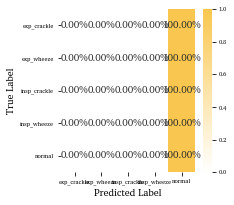

In [28]:
#classes = le.classes_

#result = network.predict(X_test[indices_test])
#y_pred = np.argmax(result, axis = 1)
#y_true = np.argmax(y_test_, axis = 1)
classes = np.unique(y_test)
f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = classes, color_index = 4)

f.savefig(figure_path + f'TSC/cm_uit_resnet_5s.pdf', bbox_inches='tight')


'''f.set_size_inches(10, 10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)'''